In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras import Input

from functions import *

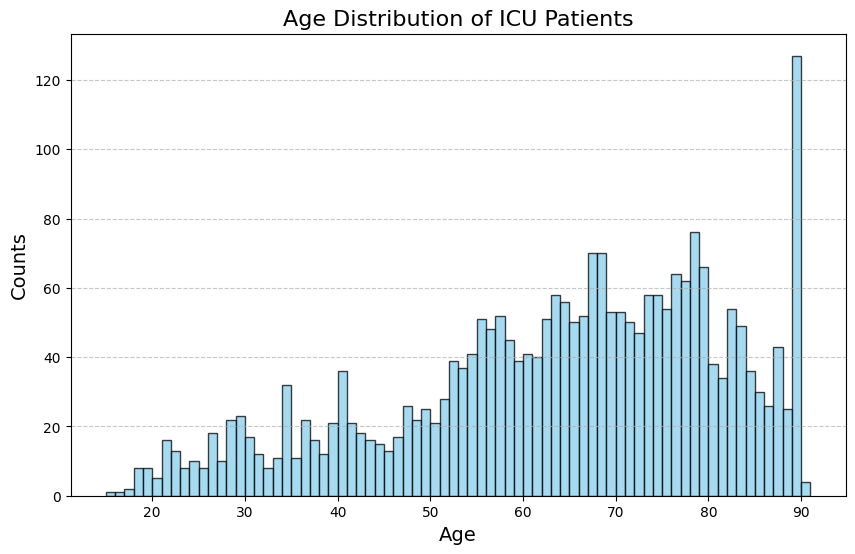

In [2]:
ages = np.load("eICU_age.npy").astype(float)
min_age, max_age = np.min(ages), np.max(ages)
#counts = Counter(ages) # useful check, usually on overflow bin

binning = np.arange(min_age, max_age+2,1)  #plots the 4 patients aged 90.0

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ages, bins=binning, density=False, alpha=0.75, color='skyblue', edgecolor='black')
plt.title('Age Distribution of ICU Patients', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
min_age = np.min(ages)
max_age = np.max(ages)
ages_normed = (ages - min_age) / (max_age - min_age)

In [4]:
# Latent space dimension
latent_dim = 100

# Generator
generator = build_generator(latent_dim)

# Discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=optimizers.legacy.Adam(0.00002, 0.5),
                      metrics=['accuracy'])

# GAN model
gan_input = Input(shape=(latent_dim,))
fake_age = generator(gan_input)
discriminator.trainable = False
gan_output = discriminator(fake_age)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizers.legacy.Adam(0.0001, 0.5))

In [ ]:
# Parameters
epochs = 3500
batch_size = 128  #tried smaller batch size, loss was too noisy

# Start training

d_loss, g_loss = train_gan(generator, discriminator, gan, ages_normed, epochs, batch_size, latent_dim)

Epoch: 0 [D loss: 0.6980827450752258] [G loss: 0.7214125394821167]
Epoch: 100 [D loss: 0.6816880702972412] [G loss: 0.7049941420555115]
Epoch: 200 [D loss: 0.6751463413238525] [G loss: 0.675743043422699]
Epoch: 300 [D loss: 0.6868445873260498] [G loss: 0.6507946252822876]
Epoch: 400 [D loss: 0.6887506246566772] [G loss: 0.6546025276184082]
Epoch: 500 [D loss: 0.6864954233169556] [G loss: 0.6823500990867615]
Epoch: 600 [D loss: 0.6850032806396484] [G loss: 0.6916622519493103]
Epoch: 700 [D loss: 0.6876001358032227] [G loss: 0.6795228719711304]
Epoch: 800 [D loss: 0.6871501207351685] [G loss: 0.6645610332489014]
Epoch: 900 [D loss: 0.6885579824447632] [G loss: 0.6551423072814941]
Epoch: 1000 [D loss: 0.6893401741981506] [G loss: 0.6513967514038086]
Epoch: 1100 [D loss: 0.6904919743537903] [G loss: 0.6578822135925293]
Epoch: 1200 [D loss: 0.6901590824127197] [G loss: 0.6495469808578491]
Epoch: 1300 [D loss: 0.6883575916290283] [G loss: 0.6511363983154297]
Epoch: 1400 [D loss: 0.6909981966

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(d_loss, label = 'Descriminator Loss')
plt.plot(g_loss, label = 'Generator Loss')
plt.title('Descriminator vs. Generator Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (BCE)', fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()